In [1]:
import ast
import glob
import pipeline
import importlib
import json
import os
import pickle
import warnings
import string
import re
import pickle
import json

import gensim
import nltk
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyLDAvis
import pyLDAvis.gensim_models
from gensim import corpora, models
from gensim.models import CoherenceModel
from wordcloud import WordCloud

In [2]:
# remove deprication warning in WordCloud source code (wordcloud-1.8.2.2)
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [3]:
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords_letters(text):
    return [i for i in text if (i not in stopwords) & (len(i) > 2)]

# Define function to create n-grams
def ngrams(text_clean_lst, n):
    output = []
    for i in range(len(text_clean_lst) - n + 1):
        output.append(' '.join(text_clean_lst[i:i + n]))
    return output

In [4]:
file_location = "/mnt/c/Users/natra/Documents/Research/Gary/Rosk-Docs/"

rosk_txt_files = glob.glob(file_location + "*txt")
rosk_txt_full = ""
rosk_txt_full_nostopwords = ""
rosk_txt_lists = []
rosk_txt_lists_nostopwords = []
rosk_txt_lists_digrams = []
rosk_txt_lists_digrams_nostopwords = []

for file in rosk_txt_files:

    with open(file, "r", errors='ignore') as f:
        txt = f.read()
        txt = txt.lower()
        # remove punctuation
        txt = re.sub(r'\d+', '', txt)
        txt = txt.translate(str.maketrans("","",string.punctuation))
        lst = txt.split()
        if lst != []:
            #print(lst)
            rosk_txt_full = rosk_txt_full + " " + txt
            rosk_txt_lists.append(lst)

            # create version with no stopwords
            txt_nostopwords = remove_stopwords_letters(lst)
            rosk_txt_lists_nostopwords.append(txt_nostopwords)
            rosk_txt_full_nostopwords = rosk_txt_full_nostopwords + " " + " ".join(txt_nostopwords)

            # create digrams
            txt_digrams = ngrams(lst, 2)
            rosk_txt_lists_digrams.append(txt_digrams)
            txt_digrams_nostopwords = ngrams(txt_nostopwords, 2)
            rosk_txt_lists_digrams_nostopwords.append(txt_digrams_nostopwords)
        

# Wordclouds

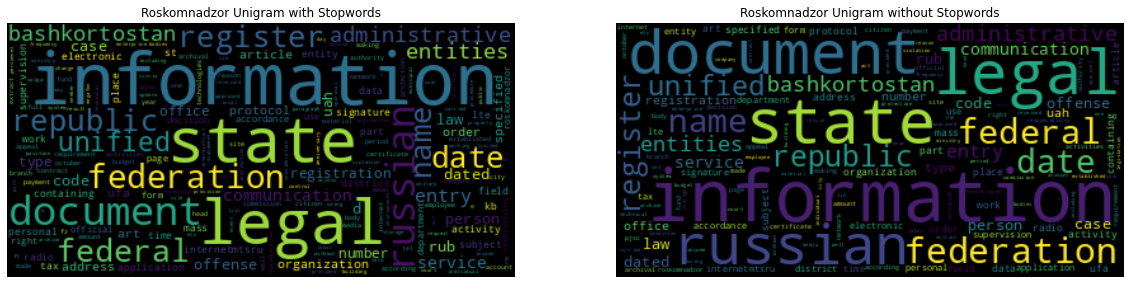

In [95]:
# Full unigram dataset, no stopword removal 
fig, axs = plt.subplots(1,2, figsize=(20,10))
Rosk_full_cloud = WordCloud(collocations = False, background_color = 'black').generate(rosk_txt_full)
axs[0].imshow(Rosk_full_cloud, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Roskomnadzor Unigram with Stopwords')

Rosk_unigram_nostopwords_cloud = WordCloud(collocations = False, background_color = 'black').generate(rosk_txt_full_nostopwords)
axs[1].imshow(Rosk_unigram_nostopwords_cloud, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('Roskomnadzor Unigram without Stopwords')

plt.show()

# Topic Modeling

In [96]:
importlib.reload(pipeline)

<module 'pipeline' from '/home/npodpx/resesarch/gary/rosk_leak/pipeline.py'>

#### Test Unigrams, with Stopwords

In [97]:
results = pipeline.choose_lda_models(rosk_txt_lists)

Training model: GensimLDA | {'chunksize': 2000, 'num_topics': 5, 'alpha': 0.1, 'eta': 0.3, 'random_state': 100}


In [ ]:
results.sort_values('Coherence',ascending=False)

,LDA Model,Params,Time Elapsed,Coherence,Perplexity,Topics
8,GensimLDA,"{'chunksize': 2000, 'num_topics': 5, 'alpha': ...",0 days 00:00:30.545823,0.637336,-10.257111,"[(0, 0.002*""highfrequency"" + 0.002*""communicat..."
3,GensimLDA,"{'chunksize': 2000, 'num_topics': 5, 'alpha': ...",0 days 00:00:28.584662,0.586209,-10.333618,"[(0, 0.005*""highfrequency"" + 0.005*""communicat..."
7,GensimLDA,"{'chunksize': 2000, 'num_topics': 5, 'alpha': ...",0 days 00:00:28.504525,0.571677,-10.236352,"[(0, 0.003*""highfrequency"" + 0.003*""communicat..."
44,GensimLDA,"{'chunksize': 2000, 'num_topics': 15, 'alpha':...",0 days 00:00:43.901870,0.571160,-10.358247,"[(0, 0.001*""administrative"" + 0.001*""radio"" + ..."
9,GensimLDA,"{'chunksize': 2000, 'num_topics': 5, 'alpha': ...",0 days 00:00:28.260114,0.528032,-10.420062,"[(0, 0.005*""highfrequency"" + 0.005*""communicat..."
6,GensimLDA,"{'chunksize': 2000, 'num_topics': 5, 'alpha': ...",0 days 00:00:26.308549,0.526337,-10.399989,"[(0, 0.005*""highfrequency"" + 0.005*""communicat..."
18,GensimLDA,"{'chunksize': 2000, 'num_topics': 10, 'alpha':...",0 days 00:00:55.412565,0.524038,-10.627008,"[(0, 0.005*""highfrequency"" + 0.005*""communicat..."
4,GensimLDA,"{'chunksize': 2000, 'num_topics': 5, 'alpha': ...",0 days 00:00:27.856845,0.517242,-10.178061,"[(0, 0.003*""highfrequency"" + 0.003*""communicat..."
19,GensimLDA,"{'chunksize': 2000, 'num_topics': 10, 'alpha':...",0 days 00:01:12.384290,0.516647,-10.469566,"[(0, 0.003*""highfrequency"" + 0.003*""communicat..."
20,GensimLDA,"{'chunksize': 2000, 'num_topics': 10, 'alpha':...",0 days 00:01:12.180782,0.512363,-10.468409,"[(0, 0.002*""highfrequency"" + 0.002*""communicat..."


In [ ]:
results.to_csv('lda_models_unigram_stopwords.csv')

#### Test Unigrams, no Stopwords

In [ ]:
results_nostop = pipeline.choose_lda_models(rosk_txt_lists_nostopwords)

Training model: GensimLDA | {'chunksize': 2000, 'num_topics': 5, 'alpha': 0.1, 'eta': 0.3, 'random_state': 100}
Coherence: 0.49981514056231396
Time Elapsed: 0:00:23.263952
Training model: GensimLDA | {'chunksize': 2000, 'num_topics': 5, 'alpha': 0.1, 'eta': 0.6, 'random_state': 100}
Coherence: 0.4531013962207875
Time Elapsed: 0:00:18.844205
Training model: GensimLDA | {'chunksize': 2000, 'num_topics': 5, 'alpha': 0.1, 'eta': 1, 'random_state': 100}
Coherence: 0.5021273884867584
Time Elapsed: 0:00:22.705851
Training model: GensimLDA | {'chunksize': 2000, 'num_topics': 5, 'alpha': 0.3, 'eta': 0.3, 'random_state': 100}
Coherence: 0.5204838557885799
Time Elapsed: 0:00:24.120463
Training model: GensimLDA | {'chunksize': 2000, 'num_topics': 5, 'alpha': 0.3, 'eta': 0.6, 'random_state': 100}
Coherence: 0.4246996687243837
Time Elapsed: 0:00:24.811679
Training model: GensimLDA | {'chunksize': 2000, 'num_topics': 5, 'alpha': 0.3, 'eta': 1, 'random_state': 100}
Coherence: 0.45697949420045847
Time 

In [ ]:
results_nostop.sort_values('Coherence',ascending=False)

,LDA Model,Params,Time Elapsed,Coherence,Perplexity,Topics
19,GensimLDA,"{'chunksize': 2000, 'num_topics': 10, 'alpha':...",0 days 00:00:56.518924,0.660336,-10.577321,"[(0, 0.000*""apr"" + 0.000*""cues"" + 0.000*""fwd"" ..."
20,GensimLDA,"{'chunksize': 2000, 'num_topics': 10, 'alpha':...",0 days 00:00:59.708194,0.647962,-10.570597,"[(0, 0.000*""apr"" + 0.000*""cues"" + 0.000*""fwd"" ..."
44,GensimLDA,"{'chunksize': 2000, 'num_topics': 15, 'alpha':...",0 days 00:00:29.476134,0.589948,-10.416818,"[(0, 0.000*""ptc"" + 0.000*""tll"" + 0.000*""ourrcr..."
34,GensimLDA,"{'chunksize': 2000, 'num_topics': 15, 'alpha':...",0 days 00:00:39.618862,0.585928,-10.849275,"[(0, 0.000*""yoyo"" + 0.000*""dyo"" + 0.000*""yoyoy..."
18,GensimLDA,"{'chunksize': 2000, 'num_topics': 10, 'alpha':...",0 days 00:00:56.123621,0.581349,-10.736264,"[(0, 0.000*""apr"" + 0.000*""cues"" + 0.000*""fwd"" ..."
35,GensimLDA,"{'chunksize': 2000, 'num_topics': 15, 'alpha':...",0 days 00:00:59.773900,0.566577,-10.849965,"[(0, 0.000*""yoyo"" + 0.000*""dyo"" + 0.000*""yoyoy..."
16,GensimLDA,"{'chunksize': 2000, 'num_topics': 10, 'alpha':...",0 days 00:01:29.152345,0.566342,-10.378848,"[(0, 0.000*""apr"" + 0.000*""cues"" + 0.000*""dec"" ..."
28,GensimLDA,"{'chunksize': 2000, 'num_topics': 10, 'alpha':...",0 days 00:00:58.586594,0.566342,-10.378848,"[(0, 0.000*""apr"" + 0.000*""cues"" + 0.000*""dec"" ..."
33,GensimLDA,"{'chunksize': 2000, 'num_topics': 15, 'alpha':...",0 days 00:00:39.991416,0.563307,-10.985621,"[(0, 0.000*""cues"" + 0.000*""yoyo"" + 0.000*""dyo""..."
29,GensimLDA,"{'chunksize': 2000, 'num_topics': 10, 'alpha':...",0 days 00:01:00.047644,0.556188,-10.382645,"[(0, 0.000*""apr"" + 0.000*""cues"" + 0.000*""dec"" ..."


In [ ]:
results_nostop.to_csv('lda_models_unigram_no_stopwords.csv')

In [ ]:
# top unigram config with no stopwords; coherence 0.660
results_nostop.sort_values('Coherence',ascending=False).head(1)["Params"].values

array([{'chunksize': 2000, 'num_topics': 10, 'alpha': 0.3, 'eta': 0.6, 'random_state': 100}],
      dtype=object)

Test Bigrams, with Stopwords

In [ ]:
results_bigram = pipeline.choose_lda_models(rosk_txt_lists_digrams)

Training model: GensimLDA | {'chunksize': 2000, 'num_topics': 5, 'alpha': 0.1, 'eta': 0.3, 'random_state': 100}
Coherence: 0.5659987639411271
Time Elapsed: 0:01:07.875802
Training model: GensimLDA | {'chunksize': 2000, 'num_topics': 5, 'alpha': 0.1, 'eta': 0.6, 'random_state': 100}
Coherence: 0.5947814666881603
Time Elapsed: 0:01:24.859144
Training model: GensimLDA | {'chunksize': 2000, 'num_topics': 5, 'alpha': 0.1, 'eta': 1, 'random_state': 100}
Coherence: 0.5195018606747575
Time Elapsed: 0:01:03.787669
Training model: GensimLDA | {'chunksize': 2000, 'num_topics': 5, 'alpha': 0.3, 'eta': 0.3, 'random_state': 100}
Coherence: 0.51613934929136
Time Elapsed: 0:01:10.898707
Training model: GensimLDA | {'chunksize': 2000, 'num_topics': 5, 'alpha': 0.3, 'eta': 0.6, 'random_state': 100}
Coherence: 0.5166599327411836
Time Elapsed: 0:01:25.916266
Training model: GensimLDA | {'chunksize': 2000, 'num_topics': 5, 'alpha': 0.3, 'eta': 1, 'random_state': 100}
Coherence: nan
Time Elapsed: 0:01:08.26

In [ ]:
results_bigram.sort_values('Coherence',ascending=False)

,LDA Model,Params,Time Elapsed,Coherence,Perplexity,Topics
41,GensimLDA,"{'chunksize': 2000, 'num_topics': 15, 'alpha':...",0 days 00:01:12.074160,0.705659,-12.654025,"[(0, 0.000*""communications extract"" + 0.000*""a..."
36,GensimLDA,"{'chunksize': 2000, 'num_topics': 15, 'alpha':...",0 days 00:01:18.828765,0.656650,-13.393093,"[(0, 0.001*""communications extract"" + 0.001*""r..."
24,GensimLDA,"{'chunksize': 2000, 'num_topics': 10, 'alpha':...",0 days 00:04:07.056336,0.655290,-13.306551,"[(0, 0.001*""communications extract"" + 0.001*""r..."
6,GensimLDA,"{'chunksize': 2000, 'num_topics': 5, 'alpha': ...",0 days 00:01:20.956229,0.621490,-12.874598,"[(0, 0.001*""communications extract"" + 0.001*""r..."
40,GensimLDA,"{'chunksize': 2000, 'num_topics': 15, 'alpha':...",0 days 00:01:13.569848,0.609218,-12.954947,"[(0, 0.001*""communications extract"" + 0.000*""a..."
1,GensimLDA,"{'chunksize': 2000, 'num_topics': 5, 'alpha': ...",0 days 00:01:24.859144,0.594781,-12.220772,"[(0, 0.001*""communications extract"" + 0.001*""r..."
0,GensimLDA,"{'chunksize': 2000, 'num_topics': 5, 'alpha': ...",0 days 00:01:07.875802,0.565999,-12.738908,"[(0, 0.001*""communications extract"" + 0.001*""r..."
39,GensimLDA,"{'chunksize': 2000, 'num_topics': 15, 'alpha':...",0 days 00:01:13.253221,0.528588,-13.664871,"[(0, 0.001*""communications extract"" + 0.001*""a..."
2,GensimLDA,"{'chunksize': 2000, 'num_topics': 5, 'alpha': ...",0 days 00:01:03.787669,0.519502,-12.043188,"[(0, 0.000*""communications extract"" + 0.000*""r..."
4,GensimLDA,"{'chunksize': 2000, 'num_topics': 5, 'alpha': ...",0 days 00:01:25.916266,0.516660,-12.316454,"[(0, 0.001*""communications extract"" + 0.001*""r..."


In [ ]:
# top bigram with stopwords result (coherence of 0.706)
results_bigram.sort_values('Coherence',ascending=False).head(1)["Params"].values

array([{'chunksize': 2000, 'num_topics': 15, 'alpha': 0.8, 'eta': 1, 'random_state': 100}],
      dtype=object)

In [ ]:
results_bigram.to_csv('lda_models_bigram_stopwords.csv')

Test Bigrams, no Stopwords

In [ ]:
results_bigram_nostop = pipeline.choose_lda_models(rosk_txt_lists_digrams_nostopwords)

Training model: GensimLDA | {'chunksize': 2000, 'num_topics': 5, 'alpha': 0.1, 'eta': 0.3, 'random_state': 100}
Coherence: 0.47445437382937933
Time Elapsed: 0:00:35.708702
Training model: GensimLDA | {'chunksize': 2000, 'num_topics': 5, 'alpha': 0.1, 'eta': 0.6, 'random_state': 100}
Coherence: 0.47569367890444736
Time Elapsed: 0:00:38.353579
Training model: GensimLDA | {'chunksize': 2000, 'num_topics': 5, 'alpha': 0.1, 'eta': 1, 'random_state': 100}
Coherence: 0.48682386942881883
Time Elapsed: 0:00:41.985516
Training model: GensimLDA | {'chunksize': 2000, 'num_topics': 5, 'alpha': 0.3, 'eta': 0.3, 'random_state': 100}
Coherence: 0.5036162934137967
Time Elapsed: 0:00:39.657032
Training model: GensimLDA | {'chunksize': 2000, 'num_topics': 5, 'alpha': 0.3, 'eta': 0.6, 'random_state': 100}
Coherence: 0.5345426154083828
Time Elapsed: 0:00:42.351552
Training model: GensimLDA | {'chunksize': 2000, 'num_topics': 5, 'alpha': 0.3, 'eta': 1, 'random_state': 100}
Coherence: 0.5472189777673058
Time

/home/npodpx/venv/lib/python3.9/site-packages/gensim/topic_coherence/direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in double_scalars
  m_lr_i = np.log(numerator / denominator)
/home/npodpx/venv/lib/python3.9/site-packages/gensim/topic_coherence/indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in double_scalars
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))


Coherence: nan
Time Elapsed: 0:00:48.007425
Training model: GensimLDA | {'chunksize': 2000, 'num_topics': 15, 'alpha': 0.1, 'eta': 0.6, 'random_state': 100}
Coherence: nan
Time Elapsed: 0:00:47.012046
Training model: GensimLDA | {'chunksize': 2000, 'num_topics': 15, 'alpha': 0.1, 'eta': 1, 'random_state': 100}
Coherence: nan
Time Elapsed: 0:00:50.126221
Training model: GensimLDA | {'chunksize': 2000, 'num_topics': 15, 'alpha': 0.3, 'eta': 0.3, 'random_state': 100}
Coherence: nan
Time Elapsed: 0:00:51.230453
Training model: GensimLDA | {'chunksize': 2000, 'num_topics': 15, 'alpha': 0.3, 'eta': 0.6, 'random_state': 100}
Coherence: nan
Time Elapsed: 0:00:53.361365
Training model: GensimLDA | {'chunksize': 2000, 'num_topics': 15, 'alpha': 0.3, 'eta': 1, 'random_state': 100}
Coherence: nan
Time Elapsed: 0:00:54.919236
Training model: GensimLDA | {'chunksize': 2000, 'num_topics': 15, 'alpha': 0.6, 'eta': 0.3, 'random_state': 100}
Coherence: 0.597552816894244
Time Elapsed: 0:00:51.268970
Trai

In [ ]:
results_bigram_nostop.sort_values('Coherence',ascending=False)

,LDA Model,Params,Time Elapsed,Coherence,Perplexity,Topics
7,GensimLDA,"{'chunksize': 2000, 'num_topics': 5, 'alpha': ...",0 days 00:00:42.417453,0.631976,-12.422464,"[(0, 0.000*""administrative offenses"" + 0.000*""..."
10,GensimLDA,"{'chunksize': 2000, 'num_topics': 5, 'alpha': ...",0 days 00:00:42.472773,0.631047,-12.452905,"[(0, 0.000*""administrative offenses"" + 0.000*""..."
8,GensimLDA,"{'chunksize': 2000, 'num_topics': 5, 'alpha': ...",0 days 00:00:45.440940,0.627327,-12.220989,"[(0, 0.000*""electronic auction"" + 0.000*""perso..."
9,GensimLDA,"{'chunksize': 2000, 'num_topics': 5, 'alpha': ...",0 days 00:00:40.451396,0.623945,-13.027574,"[(0, 0.000*""administrative offenses"" + 0.000*""..."
21,GensimLDA,"{'chunksize': 2000, 'num_topics': 10, 'alpha':...",0 days 00:00:48.598293,0.603341,-13.294650,"[(0, 0.000*""personal data"" + 0.000*""moscow mar..."
36,GensimLDA,"{'chunksize': 2000, 'num_topics': 15, 'alpha':...",0 days 00:00:51.268970,0.597553,-13.548893,"[(0, 0.000*""moscow marksistskaya"" + 0.000*""mar..."
22,GensimLDA,"{'chunksize': 2000, 'num_topics': 10, 'alpha':...",0 days 00:00:47.190314,0.563752,-12.692650,"[(0, 0.000*""personal data"" + 0.000*""limited li..."
6,GensimLDA,"{'chunksize': 2000, 'num_topics': 5, 'alpha': ...",0 days 00:00:41.569202,0.552478,-12.983792,"[(0, 0.000*""personal data"" + 0.000*""electronic..."
5,GensimLDA,"{'chunksize': 2000, 'num_topics': 5, 'alpha': ...",0 days 00:00:41.239628,0.547219,-12.167355,"[(0, 0.000*""personal data"" + 0.000*""electronic..."
4,GensimLDA,"{'chunksize': 2000, 'num_topics': 5, 'alpha': ...",0 days 00:00:42.351552,0.534543,-12.356494,"[(0, 0.000*""personal data"" + 0.000*""electronic..."


In [ ]:
results_bigram_nostop.to_csv('lda_models_bigram_no_stopwords.csv')

In [13]:
results_bigram_nostop = pd.read_csv('lda_models_bigram_no_stopwords.csv').drop(columns=["Unnamed: 0"])

In [26]:
# top 5 bigram without stopwords results
print(results_bigram_nostop.sort_values('Coherence',ascending=False).head(5)["Params"].values)


["{'chunksize': 2000, 'num_topics': 5, 'alpha': 0.6, 'eta': 0.6, 'random_state': 100}"
 "{'chunksize': 2000, 'num_topics': 5, 'alpha': 0.8, 'eta': 0.6, 'random_state': 100}"
 "{'chunksize': 2000, 'num_topics': 5, 'alpha': 0.6, 'eta': 1, 'random_state': 100}"
 "{'chunksize': 2000, 'num_topics': 5, 'alpha': 0.8, 'eta': 0.3, 'random_state': 100}"
 "{'chunksize': 2000, 'num_topics': 10, 'alpha': 0.6, 'eta': 0.3, 'random_state': 100}"]


## Train Best Models

### Best Unigram no Stopwords

In [ ]:
{'chunksize': 2000, 'num_topics': 10, 'alpha': 0.3, 'eta': 0.6, 'random_state': 100}]

In [5]:
# For digrams
uni_nostop_dict = corpora.Dictionary(rosk_txt_lists)
uni_nostop_dict.filter_extremes(no_below=200, no_above=0.80, keep_n=1000000)

uni_nostop_corpus = [uni_nostop_dict.doc2bow(doc) for doc in rosk_txt_lists]
tfidf_uni_nostop = models.TfidfModel(uni_nostop_corpus)
tfidf_uni_nostop_corpus = tfidf_uni_nostop[uni_nostop_corpus]

In [6]:
model_uni_nostop = gensim.models.ldamodel.LdaModel(corpus=tfidf_uni_nostop_corpus,
                                           id2word=uni_nostop_dict,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=2000,
                                           passes=10,
                                           alpha=0.3,
                                           eta=0.6,
                                           per_word_topics=True)

In [7]:
# To store model, dictionary, and corpus for later use:
pickle.dump(model_uni_nostop, open("models/model_uni_nostopwords.pkl", "wb"))

In [ ]:
# To load model, dictionary, and corpus from previously stored:
model_uni_nostop = pickle.load(open("models/model_uni_nostopwords.pkl", "rb"))
with open("models/model_uni_nostopwords.json") as infile:
    model_uni_nostop_json = json.load(infile)

In [8]:
# View the topics identified in the above model
model_uni_nostop.print_topics()

[(0,
  '0.056*"is" + 0.050*"date" + 0.047*"which" + 0.038*"as" + 0.026*"information" + 0.025*"on" + 0.024*"russia" + 0.022*"a" + 0.017*"number" + 0.016*"or"'),
 (1,
  '0.048*"administrative" + 0.044*"bashkortostan" + 0.042*"republic" + 0.037*"no" + 0.034*"dated" + 0.028*"roskomnadzor" + 0.027*"district" + 0.025*"department" + 0.025*"to" + 0.022*"on"'),
 (2,
  '0.096*"highfrequency" + 0.091*"devices" + 0.090*"radioelectronic" + 0.085*"communications" + 0.084*"extract" + 0.075*"registered" + 0.065*"sphere" + 0.063*"means" + 0.058*"register" + 0.048*"technologies"'),
 (3,
  '0.117*"company" + 0.075*"liability" + 0.075*"limited" + 0.050*"ufa" + 0.030*"to" + 0.028*"a" + 0.025*"with" + 0.025*"tin" + 0.024*"i" + 0.024*"no"'),
 (4,
  '0.014*"communications" + 0.013*"from" + 0.013*"registered" + 0.013*"sphere" + 0.013*"with" + 0.013*"service" + 0.013*"a" + 0.012*"technologies" + 0.012*"information" + 0.012*"mass"'),
 (5,
  '0.063*"electronic" + 0.049*"services" + 0.048*"application" + 0.030*"ti

#### Dynamic Visualization of Topics

In [9]:
pyLDAvis.enable_notebook()
uni_nostop_plot = pyLDAvis.gensim_models.prepare(model_uni_nostop, tfidf_uni_nostop_corpus, uni_nostop_dict,sort_topics=False)
uni_nostop_plot

/home/npodpx/venv/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
/home/npodpx/venv/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/npodpx/venv/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/npodpx/venv/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/npodpx/venv/lib/python3.9/site-packages/past/builtins/misc.py:45: Deprec

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.018995  0.009662       1        1   4.704259
1      0.060770 -0.036446       2        1  19.813668
2     -0.396846 -0.009753       3        1  15.406506
3      0.092865 -0.061559       4        1   8.494317
4     -0.033701 -0.002921       5        1   4.236099
5      0.072536  0.015824       6        1   7.343908
6     -0.040657 -0.009370       7        1   4.250613
7      0.089929 -0.012044       8        1   6.898547
8      0.088792 -0.041254       9        1  16.595514
9      0.047316  0.147862      10        1  12.256569, topic_info=               Term       Freq      Total Category  logprob  loglift
31          company  53.000000  53.000000  Default  30.0000  30.0000
9     highfrequency  65.000000  65.000000  Default  29.0000  29.0000
14  radioelectronic  62.000000  62.000000  Default  28.0000  28.0000
7           devices  64.000000  64.000000  Default  27.0000  27.0000
37                e  43.000000  43.000000  Default  26.0000  26.0000
..              ...        ...        ...      ...      ...      ...
28    bashkortostan   5.534470  60.784925  Topic10  -4.4509  -0.2972
15         republic   5.707080  63.091939  Topic10  -4.4201  -0.3038
41               no   6.378394  73.673325  Topic10  -4.3089  -0.3476
61               on   4.946039  73.292292  Topic10  -4.5633  -0.5968
47               to   4.634476  77.998330  Topic10  -4.6283  -0.7241

[436 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         1  0.059148        a
0         2  0.177444        a
0         4  0.133083        a
0         5  0.029574        a
0         6  0.059148        a
...     ...       ...      ...
50        6  0.043301  without
50        7  0.086602  without
50        8  0.043301  without
50        9  0.216506  without
50       10  0.043301  without

[837 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

#### Wordcloud Visualization of Topics

In [10]:
# Code modified from https://medium.com/swlh/topic-modeling-lda-mallet-implementation-in-python-part-2-602ffb38d396
topics_uni_stop = [[(term, round(wt, 3)) for term, wt in model_uni_nostop.show_topic(n, topn=20)] for n in range(0, model_uni_nostop.num_topics)]
# Code modified from https://medium.com/swlh/topic-modeling-lda-mallet-implementation-in-python-part-2-602ffb38d396
topics_uni_stop_df = pd.DataFrame([', '.join([term for term, wt in topic]) for topic in topics_uni_stop], columns = ['Terms per Topic'], index=['Topic'+str(t) for t in range(1, model_uni_nostop.num_topics+1)] )
topics_uni_stop_df

,Terms per Topic
Topic1,"is, date, which, as, information, on, russia, ..."
Topic2,"administrative, bashkortostan, republic, no, d..."
Topic3,"highfrequency, devices, radioelectronic, commu..."
Topic4,"company, liability, limited, ufa, to, a, with,..."
Topic5,"communications, from, registered, sphere, with..."
Topic6,"electronic, services, application, time, or, n..."
Topic7,"communications, technologies, i, no, sphere, u..."
Topic8,"e, i, documents, a, with, other, to, on, feder..."
Topic9,"to, is, on, law, by, russian, art, federation,..."
Topic10,"name, code, document, legal, date, certificate..."


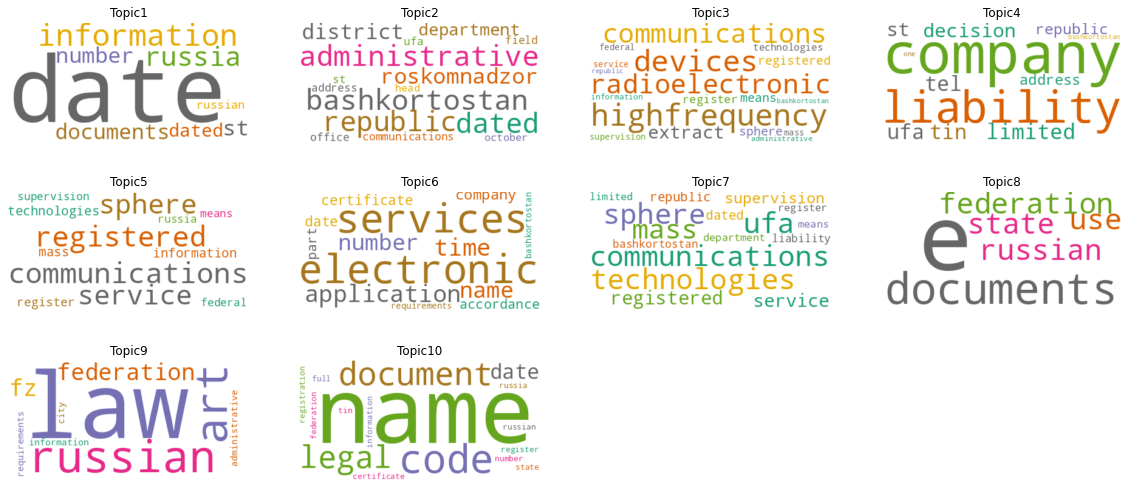

In [11]:
# Code modified from https://medium.com/swlh/topic-modeling-lda-mallet-implementation-in-python-part-2-602ffb38d396

# initiate wordcloud object
wc = WordCloud(background_color="white", colormap="Dark2", max_font_size=150, random_state=100)

# set the figure size
plt.rcParams['figure.figsize'] = [20, 15]

# Create subplots for each topic
for i in range(10):

    wc.generate(text=topics_uni_stop_df["Terms per Topic"][i])
    
    plt.subplot(5, 4, i+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(topics_uni_stop_df.index[i])

plt.show()

### Best Bigram with Stopwords

In [16]:
# For digrams
bi_nostop_dict = corpora.Dictionary(rosk_txt_lists_digrams)
bi_nostop_dict.filter_extremes(no_below=200, no_above=0.80, keep_n=1000000)

bi_nostop_corpus = [bi_nostop_dict.doc2bow(doc) for doc in rosk_txt_lists_digrams_nostopwords]
tfidf_bi_nostop = models.TfidfModel(bi_nostop_corpus)
tfidf_bi_nostop_corpus = tfidf_bi_nostop[bi_nostop_corpus]

In [ ]:
{'chunksize': 2000, 'num_topics': 10, 'alpha': 0.6, 'eta': 0.3, 'random_state': 100}

In [17]:
model_bi_nostop = gensim.models.ldamodel.LdaModel(corpus=tfidf_bi_nostop_corpus,
                                           id2word=bi_nostop_dict,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=2000,
                                           passes=10,
                                           alpha=0.6,
                                           eta=0.3,
                                           per_word_topics=True)

In [18]:
# To store model, dictionary, and corpus for later use:
pickle.dump(model_bi_nostop, open("models/model_bi_no_stopwords.pkl", "wb"))

In [19]:
# View the topics identified in the above model
model_bi_nostop.print_topics()

[(0,
  '0.196*"federal law" + 0.125*"russian federation" + 0.102*"federal service" + 0.093*"mass communications" + 0.085*"information technologies" + 0.085*"communications information" + 0.045*"register registered" + 0.038*"radioelectronic means" + 0.034*"highfrequency devices" + 0.031*"registered radioelectronic"'),
 (1,
  '0.175*"communications information" + 0.170*"russian federation" + 0.158*"federal service" + 0.148*"mass communications" + 0.135*"information technologies" + 0.069*"federal law" + 0.014*"register registered" + 0.011*"radioelectronic means" + 0.011*"communications extract" + 0.009*"highfrequency devices"'),
 (2,
  '0.587*"russian federation" + 0.101*"federal law" + 0.089*"mass communications" + 0.042*"communications information" + 0.032*"information technologies" + 0.026*"federal service" + 0.007*"radioelectronic means" + 0.006*"registered radioelectronic" + 0.006*"register registered" + 0.006*"communications extract"'),
 (3,
  '0.144*"radioelectronic means" + 0.143*

#### Dynamic Visualization of Topics

In [20]:
pyLDAvis.enable_notebook()
bigram_nostop_plot = pyLDAvis.gensim_models.prepare(model_bi_nostop, tfidf_bi_nostop_corpus, bi_nostop_dict,sort_topics=False)
bigram_nostop_plot

/home/npodpx/venv/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
/home/npodpx/venv/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/npodpx/venv/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/npodpx/venv/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/npodpx/venv/lib/python3.9/site-packages/past/builtins/misc.py:45: Deprec

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.027879  0.025829       1        1  15.548340
1     -0.015256 -0.056399       2        1  19.427166
2     -0.150824 -0.012266       3        1  17.370306
3      0.264608  0.005075       4        1  30.513703
4     -0.126408  0.037760       5        1  17.140485, topic_info=                          Term        Freq       Total Category  logprob  \
44          russian federation  311.000000  311.000000  Default  30.0000   
37                 federal law  162.000000  162.000000  Default  29.0000   
2        highfrequency devices   74.000000   74.000000  Default  28.0000   
20  registered radioelectronic   73.000000   73.000000  Default  27.0000   
10      communications extract   72.000000   72.000000  Default  26.0000   
..                         ...         ...         ...      ...      ...   
7        radioelectronic means    2.776902   77.358648   Topic5  -4.4608   
19         register registered    2.620061   77.788373   Topic5  -4.5189   
10      communications extract    2.296395   72.921837   Topic5  -4.6508   
20  registered radioelectronic    2.225366   73.291865   Topic5  -4.6822   
2        highfrequency devices    1.659975   74.235010   Topic5  -4.9753   

    loglift  
44  30.0000  
37  29.0000  
2   28.0000  
20  27.0000  
10  26.0000  
..      ...  
7   -1.5634  
19  -1.6271  
10  -1.6943  
20  -1.7308  
2   -2.0367  

[217 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
32        1  0.352439        about the
32        2  0.352439        about the
32        3  0.352439        about the
32        5  0.352439        about the
33        1  0.352439  accordance with
...     ...       ...              ...
31        5  0.352439           to the
47        1  0.352439         with the
47        2  0.352439         with the
47        3  0.352439         with the
47        5  0.352439         with the

[223 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5])

#### Wordcloud Visualization of Topics

In [21]:
# Code modified from https://medium.com/swlh/topic-modeling-lda-mallet-implementation-in-python-part-2-602ffb38d396
topics_bi_nostop = [[(term, round(wt, 3)) for term, wt in model_bi_nostop.show_topic(n, topn=20)] for n in range(0, model_bi_nostop.num_topics)]
# Code modified from https://medium.com/swlh/topic-modeling-lda-mallet-implementation-in-python-part-2-602ffb38d396
topics_bi_nostop_df = pd.DataFrame([', '.join([term for term, wt in topic]) for topic in topics_bi_nostop], columns = ['Terms per Topic'], index=['Topic'+str(t) for t in range(1, model_bi_nostop.num_topics+1)] )
topics_bi_nostop_df

,Terms per Topic
Topic1,"federal law, russian federation, federal servi..."
Topic2,"communications information, russian federation..."
Topic3,"russian federation, federal law, mass communic..."
Topic4,"radioelectronic means, highfrequency devices, ..."
Topic5,"russian federation, federal law, mass communic..."


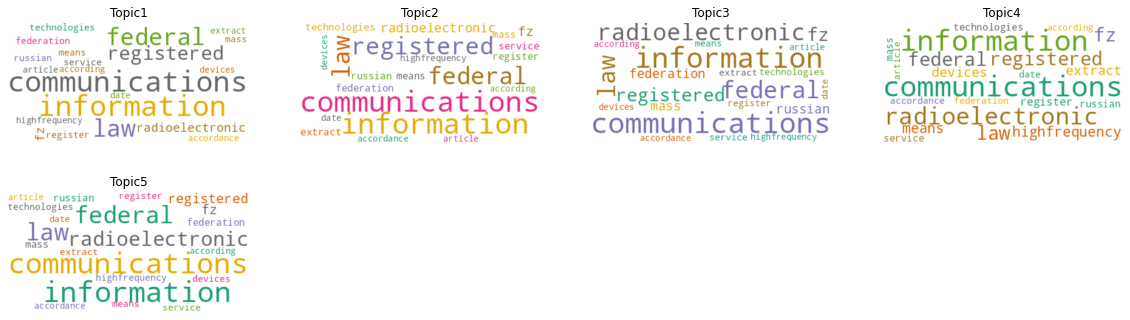

In [23]:
# Code modified from https://medium.com/swlh/topic-modeling-lda-mallet-implementation-in-python-part-2-602ffb38d396

# initiate wordcloud object
wc = WordCloud(background_color="white", colormap="Dark2", max_font_size=150, random_state=100)

# set the figure size
plt.rcParams['figure.figsize'] = [20, 15]

# Create subplots for each topic
for i in range(5):

    wc.generate(text=topics_bi_nostop_df["Terms per Topic"][i])
    
    plt.subplot(5, 4, i+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(topics_bi_nostop_df.index[i])

plt.show()

### Best Bigram with Stopwords

In [ ]:
# For digrams
bi_dict = corpora.Dictionary(rosk_txt_lists_digrams)
bi_dict.filter_extremes(no_below=200, no_above=0.80, keep_n=1000000)

bi_corpus = [bi_dict.doc2bow(doc) for doc in rosk_txt_lists_digrams]
tfidf_bi = models.TfidfModel(bi_corpus)
tfidf_bi_corpus = tfidf_bi[bi_corpus]

In [ ]:
model_bi = gensim.models.ldamodel.LdaModel(corpus=tfidf_bi_corpus,
                                           id2word=bi_dict,
                                           num_topics=15, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=2000,
                                           passes=10,
                                           alpha=0.8,
                                           eta=1,
                                           per_word_topics=True)

In [ ]:
# To store model, dictionary, and corpus for later use:
pickle.dump(model_bi, open("models/model_bi_stopwords.pkl", "wb"))

In [ ]:
# To load model, dictionary, and corpus from previously stored:
model_bi = pickle.load(open("models/model_bi.pkl", "rb"))
with open("models/model_bi.json") as infile:
    model_bi_json = json.load(infile)

In [ ]:
# View the topics identified in the above model
model_bi.print_topics()

[(0,
  '0.065*"of the" + 0.033*"republic of" + 0.025*"the russian" + 0.025*"of bashkortostan" + 0.024*"the republic" + 0.023*"to the" + 0.022*"highfrequency devices" + 0.022*"date of" + 0.022*"registered radioelectronic" + 0.022*"name of"'),
 (1,
  '0.075*"of the" + 0.032*"the republic" + 0.032*"of bashkortostan" + 0.032*"republic of" + 0.026*"russian federation" + 0.024*"the russian" + 0.023*"the federal" + 0.022*"name of" + 0.022*"to the" + 0.020*"date of"'),
 (2,
  '0.082*"of the" + 0.039*"republic of" + 0.030*"the russian" + 0.029*"the republic" + 0.029*"date of" + 0.028*"of bashkortostan" + 0.028*"russian federation" + 0.027*"to the" + 0.024*"on the" + 0.023*"the federal"'),
 (3,
  '0.106*"of the" + 0.038*"republic of" + 0.032*"of bashkortostan" + 0.024*"the republic" + 0.023*"on the" + 0.023*"to the" + 0.023*"for the" + 0.022*"the russian" + 0.022*"radioelectronic means" + 0.021*"with the"'),
 (4,
  '0.052*"of the" + 0.030*"registered radioelectronic" + 0.029*"communications extr

#### Dynamic Visualization of Topics

In [ ]:
pyLDAvis.enable_notebook()
bigram_plot = pyLDAvis.gensim_models.prepare(model_bi, tfidf_bi_corpus, bi_dict,sort_topics=False)
bigram_plot

/home/npodpx/venv/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
/home/npodpx/venv/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/npodpx/venv/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/npodpx/venv/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/npodpx/venv/lib/python3.9/site-packages/past/builtins/misc.py:45: Deprec

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
0      0.002142 -0.000590       1        1  6.629016
1     -0.000469 -0.000189       2        1  6.627660
2     -0.009812 -0.001408       3        1  6.620104
3     -0.003223  0.003460       4        1  6.624408
4      0.010761  0.000321       5        1  6.803635
5      0.023459 -0.000043       6        1  7.051254
6      0.001173  0.001752       7        1  6.632925
7     -0.004107 -0.000913       8        1  6.625206
8     -0.003317 -0.002065       9        1  6.615311
9     -0.002152  0.001728      10        1  6.629142
10    -0.012271  0.000209      11        1  6.621188
11    -0.000383 -0.000989      12        1  6.621769
12     0.000273 -0.001775      13        1  6.615072
13    -0.005920  0.001243      14        1  6.627239
14     0.003844 -0.000742      15        1  6.656069, topic_info=                          Term        Freq       Total Category  logprob  \
6                       of the  235.000000  235.000000  Default  30.0000   
10      communications extract   61.000000   61.000000  Default  29.0000   
29            of bashkortostan   89.000000   89.000000  Default  28.0000   
20  registered radioelectronic   61.000000   61.000000  Default  27.0000   
3                    means and   58.000000   58.000000  Default  26.0000   
..                         ...         ...         ...      ...      ...   
28                     for the    4.129724   65.013426  Topic15  -3.9319   
29            of bashkortostan    5.270622   89.793815  Topic15  -3.6879   
44          russian federation    4.866487   81.060492  Topic15  -3.7677   
36                     date of    4.069141   64.446804  Topic15  -3.9467   
8                  republic of    4.778810   99.673512  Topic15  -3.7859   

    loglift  
6   30.0000  
10  29.0000  
29  28.0000  
20  27.0000  
3   26.0000  
..      ...  
28  -0.0467  
29  -0.1257  
44  -0.1032  
36  -0.0528  
8   -0.3281  

[636 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
32        1  0.066726  about the
32        2  0.066726  about the
32        3  0.088967  about the
32        4  0.066726  about the
32        5  0.066726  about the
...     ...       ...        ...
47       11  0.056254   with the
47       12  0.075005   with the
47       13  0.075005   with the
47       14  0.075005   with the
47       15  0.056254   with the

[810 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

#### Wordcloud Visualization of Topics

In [90]:
# Code modified from https://medium.com/swlh/topic-modeling-lda-mallet-implementation-in-python-part-2-602ffb38d396
topics_bi = [[(term, round(wt, 3)) for term, wt in model_bi.show_topic(n, topn=20)] for n in range(0, model_bi.num_topics)]
# Code modified from https://medium.com/swlh/topic-modeling-lda-mallet-implementation-in-python-part-2-602ffb38d396
topics_bi_df = pd.DataFrame([', '.join([term for term, wt in topic]) for topic in topics_bi], columns = ['Terms per Topic'], index=['Topic'+str(t) for t in range(1, model_bi.num_topics+1)] )
topics_bi_df

,Terms per Topic
Topic1,"of the, republic of, the russian, of bashkorto..."
Topic2,"of the, the republic, of bashkortostan, republ..."
Topic3,"of the, republic of, the russian, the republic..."
Topic4,"of the, republic of, of bashkortostan, the rep..."
Topic5,"of the, registered radioelectronic, communicat..."
Topic6,"communications extract, of the, highfrequency ..."
Topic7,"of the, republic of, russian federation, of ba..."
Topic8,"of the, russian federation, republic of, the r..."
Topic9,"of the, republic of, of bashkortostan, russian..."
Topic10,"of the, of bashkortostan, republic of, on the,..."


In [ ]:
# Code modified from https://medium.com/swlh/topic-modeling-lda-mallet-implementation-in-python-part-2-602ffb38d396

# initiate wordcloud object
wc = WordCloud(background_color="white", colormap="Dark2", max_font_size=150, random_state=100)

# set the figure size
plt.rcParams['figure.figsize'] = [20, 15]

# Create subplots for each topic
for i in range(10):

    wc.generate(text=topics_df["Terms per Topic"][i])
    
    plt.subplot(5, 4, i+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(topics_df.index[i])

plt.show()

## Resources

https://www.geeksforgeeks.org/text-preprocessing-in-python-set-1/

https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python-codes/